In [1]:
!pip install tensorflow opencv-python matplotlib

import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

# **MODEL LOADING**

In [2]:
# Download YOLOv3 weights
!wget https://pjreddie.com/media/files/yolov3.weights

# Download YOLOv3 config file
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg

# Download COCO names (class labels)
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names

--2024-10-27 16:29:52--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  31.5MB/s    in 7.5s    

2024-10-27 16:30:00 (31.5 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2024-10-27 16:30:00--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      

2

In [3]:
# Load YOLO model and configuration
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')

# Extract the output layer names from the YOLO model
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# Load class names from COCO dataset
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# **Image Input**

In [4]:
# Load and preprocess the image for YOLO detection
def load_image(img_path):
    image = cv2.imread(img_path)
    height, width, channels = image.shape

    blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)

    outs = net.forward(output_layers)

    return image, outs, height, width

# **Object Detection**

In [5]:
# Process the detections and draw bounding boxes with labels
def process_detections(image, outs, height, width):
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]

            if confidence > 0.5:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

                label = f"{classes[class_id]}: {confidence:.2f}"
                cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

# **Visualization**

In [6]:
# Visualize the detection results using matplotlib
def visualize_image(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    yolo_result = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.axis('off')
    plt.show()

# **Testing**

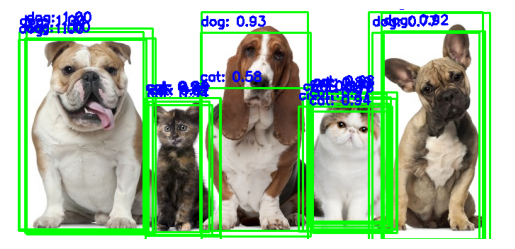

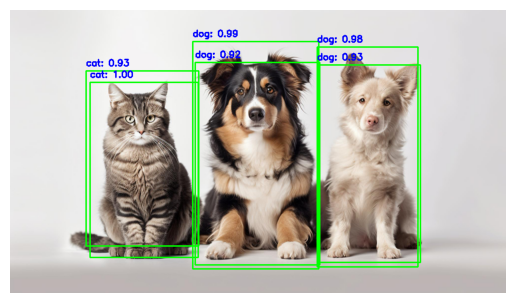

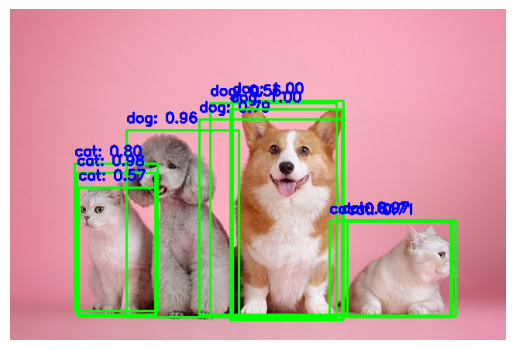

In [8]:
# Test the YOLO model on a list of images
def test_yolo_on_images(image_paths):
    for img_path in image_paths:
        image, outs, height, width = load_image(img_path)
        process_detections(image, outs, height, width)
        visualize_image(image)

# Example usage of the YOLO model with test images
test_images = ["image1.jpg" , "image2.jpeg", "image3.jpg"]
test_yolo_on_images(test_images)